# Census Chaos

In 2020, thirteen states (little confusing) adjusted the census data to reallocate incarcerated populations at addresses prior to incarceration to avoid prison gerrymandering. This notebook looks at the differences between the original Census PL 94-171 population numbers to the amended files by the states. The files being imported are primarily via the Redistricting Hub API. https://redistrictingdatahub.org/

States involved: CA, CO, CT, DE, MA?, MD, MT, NJ, NV, NY, PA, VA, WA, IL(2030?)

##### Imports

In [1]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)

from plotnine import *

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Necessary imports
import pandas as pd
from plotnine import *

# I don't think we use these?
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [206]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('explore')
require('tidyr')
require('forcats')
require('knitr')
require('ragg')
require('palmerpenguins')
# require('theme538')

R[write to console]: Loading required package: ragg



In [6]:
df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,75,9
1,25,72
2,14,60
3,0,60
4,50,52


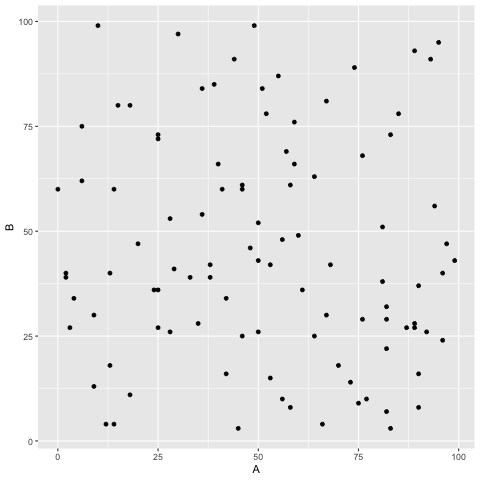

In [7]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

----

##### U.S. Census data Abbreviations

Abbreviations Glossary https://www.census.gov/pred/www/rpts/TXE%20Program%20Summary%20Appendix%20B.pdf

More codes http://starr.tamu.edu/files/2013/01/Census-Codes.pdf

FILEID = file id

STUSAB = State abbreviation

SUMLEV = Census Bureau code to indicate geography type. 
For example, in the raw census data, all states have a SUMLEV code of “040.”

CHARITER = characteristic iteration

CIFSN = characteristic iteration file sequence number 

LOGRECNO = unique logical record number 


P0010001 = Total population Total

P0020001 = Total population Total

P0030001 = Total population 18 years and over Total

P0050001 = Total Group Quarters Population

P0050003 = Correctional facilities for adults

P0050004 = Juvenile facilities

-----

## California

2020 PL 94-171 Data Summary File for California based on the Decennial Census at the Block level

In [8]:
df_ca1 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_b_csv//ca_pl2020_b.csv", encoding="utf-8")

In [9]:
df_ca1.head(5)

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CA,750,0,0,0,148466,7500000US060014001001000,60014001001000,4,9,6,1779778,1,H1,1675839,92230,Z5,1935228,99999,99,99999999,53000,C1,2411292,400100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,41860,1,488,36084,99999,9,999,99999,Y,N,13,9,15,99999,99999,28050,51124,0,1000,Block 1000,S,0,0,37.880348,-122.228550,BK,99999,60014001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
len(df_ca1)

519723

Creating a subset with key info and key population numbers

In [11]:
df_ca1_subset = df_ca1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [12]:
df_ca1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CA,60014001001000,1,400100,1,1000,51124,Block 1000,37.880348,-122.228550,0,0,0,0,0,0
1,PLST,CA,60014001001001,1,400100,1,1001,695414,Block 1001,37.879219,-122.228772,0,0,0,0,0,0
2,PLST,CA,60014001001002,1,400100,1,1002,9330,Block 1002,37.882910,-122.238471,0,0,0,0,0,0
3,PLST,CA,60014001001003,1,400100,1,1003,1232350,Block 1003,37.875405,-122.237007,0,0,0,0,0,0
4,PLST,CA,60014001001004,1,400100,1,1004,3524,Block 1004,37.881882,-122.243788,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,PLST,CA,61150411021044,115,41102,1,1044,26265,Block 1044,39.314107,-121.210561,0,0,0,0,0,0
519719,PLST,CA,61150411021045,115,41102,1,1045,0,Block 1045,39.317411,-121.206220,0,0,0,0,0,0
519720,PLST,CA,61150411021046,115,41102,1,1046,3003346,Block 1046,39.332694,-121.211516,18,18,12,0,0,0
519721,PLST,CA,61150411021047,115,41102,1,1047,2589903,Block 1047,39.353227,-121.261982,135,135,121,0,0,0


2020 PL 94-171 Data Summary File for California based on the Decennial Census at the Block Group level

In [13]:
df_ca2 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_bg_csv//ca_pl2020_bg.csv", encoding="utf-8")

In [14]:
# df_ca2

In [15]:
len(df_ca2)

25607

In [16]:
df_ca2_subset = df_ca2[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [17]:
# df_ca2_subset

##### 2020 Redistricting Data for California at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Statewide Database at https://statewidedatabase.org/redistricting2021/counties.html#

In [18]:
df_ca3 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//state_PL94_2020_Adjusted_P24_DOJ_Block.csv", encoding="utf-8")

In [19]:
df_ca3.head(5)

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,PLACE20,SUMLEV,Population P2,Hispanic Origin,Not Hispanic,NH_1 Race,NH_Wht,NH_Blk,NH_Ind,NH_Asn,NH_Hwn,NH_Oth,NH_2+ Races,NH_2 Races,NH_WhtBlk,NH_WhtInd,NH_WhtAsn,NH_WhtHwn,NH_WhtOth,NH_BlkInd,NH_BlkAsn,NH_BlkHwn,NH_BlkOth,NH_IndAsn,NH_IndHwn,NH_IndOth,NH_AsnHwn,NH_AsnOth,NH_HwnOth,NH_3 Races,NH_WhtBlkInd,NH_WhtBlkAsn,NH_WhtBlkHwn,NH_WhtBlkOth,NH_WhtIndAsn,NH_WhtIndHwn,NH_WhtIndOth,NH_WhtAsnHwn,NH_WhtAsnOth,NH_WhtHwnOth,NH_BlkIndAsn,NH_BlkIndHwn,NH_BlkIndOth,NH_BlkAsnHwn,NH_BlkAsnOth,NH_BlkHwnOth,NH_IndAsnHwn,NH_IndAsnOth,NH_IndHwnOth,NH_AsnHwnOth,NH_4 Races,NH_WhtBlkIndAsn,NH_WhtBlkIndHwn,NH_WhtBlkIndOth,NH_WhtBlkAsnHwn,NH_WhtBlkAsnOth,NH_WhtBlkHwnOth,NH_WhtIndAsnHwn,NH_WhtIndAsnOth,NH_WhtIndHwnOth,NH_WhtAsnHwnOth,NH_BlkIndAsnHwn,NH_BlkIndAsnOth,NH_BlkIndHwnOth,NH_BlkAsnHwnOth,NH_IndAsnHwnOth,NH_5 Races,NH_WhtBlkIndAsnHwn,NH_WhtBlkIndAsnOth,NH_WhtBlkIndHwnOth,NH_WhtBlkAsnHwnOth,NH_WhtIndAsnHwnOth,NH_BlkIndAsnHwnOth,NH_6 Races,NH_WhtBlkIndAsnHwnOth,18+_Population P4,H18+_Pop,NH18+_Pop,NH18+_1 Race,NH18+_Wht,NH18+_Blk,NH18+_Ind,NH18+_Asn,NH18+_Hwn,NH18+_Oth,NH18+_2+ Races,NH18+_2 Races,NH18+_WhtBlk,NH18+_WhtInd,NH18+_WhtAsn,NH18+_WhtHwn,NH18+_WhtOth,NH18+_BlkInd,NH18+_BlkAsn,NH18+_BlkHwn,NH18+_BlkOth,NH18+_IndAsn,NH18+_IndHwn,NH18+_IndOth,NH18+_AsnHwn,NH18+_AsnOth,NH18+_HwnOth,NH18+_3 Races,NH18+_WhtBlkInd,NH18+_WhtBlkAsn,NH18+_WhtBlkHwn,NH18+_WhtBlkOth,NH18+_WhtIndAsn,NH18+_WhtIndHwn,NH18+_WhtIndOth,NH18+_WhtAsnHwn,NH18+_WhtAsnOth,NH18+_WhtHwnOth,NH18+_BlkIndAsn,NH18+_BlkIndHwn,NH18+_BlkIndOth,NH18+_BlkAsnHwn,NH18+_BlkAsnOth,NH18+_BlkHwnOth,NH18+_IndAsnHwn,NH18+_IndAsnOth,NH18+_IndHwnOth,NH18+_AsnHwnOth,NH18+_4 Races,NH18+_WhtBlkIndAsn,NH18+_WhtBlkIndHwn,NH18+_WhtBlkIndOth,NH18+_WhtBlkAsnHwn,NH18+_WhtBlkAsnOth,NH18+_WhtBlkHwnOth,NH18+_WhtIndAsnHwn,NH18+_WhtIndAsnOth,NH18+_WhtIndHwnOth,NH18+_WhtAsnHwnOth,NH18+_BlkIndAsnHwn,NH18+_BlkIndAsnOth,NH18+_BlkIndHwnOth,NH18+_BlkAsnHwnOth,NH18+_IndAsnHwnOth,NH18+_5 Races,NH18+_WhtBlkIndAsnHwn,NH18+_WhtBlkIndAsnOth,NH18+_WhtBlkIndHwnOth,NH18+_WhtBlkAsnHwnOth,NH18+_WhtIndAsnHwnOth,NH18+_BlkIndAsnHwnOth,NH18+_6 Races,NH18+_WhtBlkIndAsnHwnOth,DOJ_NH_Blk,DOJ_NH_Ind,DOJ_NH_Asn,DOJ_NH_Hwn,DOJ_NH_Oth,DOJ_NH_OthMR,DOJ_NH18+_Blk,DOJ_NH18+_Ind,DOJ_NH18+_Asn,DOJ_NH18+_Hwn,DOJ_NH18+_Oth,DOJ_NH18+_OthMR
0,60014001001000,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,60014001001001,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60014001001002,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60014001001003,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60014001001004,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [20]:
df_ca3_subset = df_ca3[['BLOCK20', 'BLKGRP20', 'TRACT20', 'COUNTY20', 'Population P2', '18+_Population P4']]

In [21]:
df_ca3_subset

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4
0,60014001001000,60014001001,6001400100,1,0,0
1,60014001001001,60014001001,6001400100,1,0,0
2,60014001001002,60014001001,6001400100,1,0,0
3,60014001001003,60014001001,6001400100,1,0,0
4,60014001001004,60014001001,6001400100,1,0,0
...,...,...,...,...,...,...
519718,61150411021044,61150411021,6115041102,115,0,0
519719,61150411021045,61150411021,6115041102,115,0,0
519720,61150411021046,61150411021,6115041102,115,19,13
519721,61150411021047,61150411021,6115041102,115,135,121


Column / Headers of Adjusted Data

In [22]:
df_ca14 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//PL94_2020_Adjusted_P24_DOJ_csv_headers.csv", encoding="utf-8")
df_ca14

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,PLACE20,SUMLEV,Population P2,Hispanic Origin,Not Hispanic,NH_1 Race,NH_Wht,NH_Blk,NH_Ind,NH_Asn,NH_Hwn,NH_Oth,NH_2+ Races,NH_2 Races,NH_WhtBlk,NH_WhtInd,NH_WhtAsn,NH_WhtHwn,NH_WhtOth,NH_BlkInd,NH_BlkAsn,NH_BlkHwn,NH_BlkOth,NH_IndAsn,NH_IndHwn,NH_IndOth,NH_AsnHwn,NH_AsnOth,NH_HwnOth,NH_3 Races,NH_WhtBlkInd,NH_WhtBlkAsn,NH_WhtBlkHwn,NH_WhtBlkOth,NH_WhtIndAsn,NH_WhtIndHwn,NH_WhtIndOth,NH_WhtAsnHwn,NH_WhtAsnOth,NH_WhtHwnOth,NH_BlkIndAsn,NH_BlkIndHwn,NH_BlkIndOth,NH_BlkAsnHwn,NH_BlkAsnOth,NH_BlkHwnOth,NH_IndAsnHwn,NH_IndAsnOth,NH_IndHwnOth,NH_AsnHwnOth,NH_4 Races,NH_WhtBlkIndAsn,NH_WhtBlkIndHwn,NH_WhtBlkIndOth,NH_WhtBlkAsnHwn,NH_WhtBlkAsnOth,NH_WhtBlkHwnOth,NH_WhtIndAsnHwn,NH_WhtIndAsnOth,NH_WhtIndHwnOth,NH_WhtAsnHwnOth,NH_BlkIndAsnHwn,NH_BlkIndAsnOth,NH_BlkIndHwnOth,NH_BlkAsnHwnOth,NH_IndAsnHwnOth,NH_5 Races,NH_WhtBlkIndAsnHwn,NH_WhtBlkIndAsnOth,NH_WhtBlkIndHwnOth,NH_WhtBlkAsnHwnOth,NH_WhtIndAsnHwnOth,NH_BlkIndAsnHwnOth,NH_6 Races,NH_WhtBlkIndAsnHwnOth,18+_Population P4,H18+_Pop,NH18+_Pop,NH18+_1 Race,NH18+_Wht,NH18+_Blk,NH18+_Ind,NH18+_Asn,NH18+_Hwn,NH18+_Oth,NH18+_2+ Races,NH18+_2 Races,NH18+_WhtBlk,NH18+_WhtInd,NH18+_WhtAsn,NH18+_WhtHwn,NH18+_WhtOth,NH18+_BlkInd,NH18+_BlkAsn,NH18+_BlkHwn,NH18+_BlkOth,NH18+_IndAsn,NH18+_IndHwn,NH18+_IndOth,NH18+_AsnHwn,NH18+_AsnOth,NH18+_HwnOth,NH18+_3 Races,NH18+_WhtBlkInd,NH18+_WhtBlkAsn,NH18+_WhtBlkHwn,NH18+_WhtBlkOth,NH18+_WhtIndAsn,NH18+_WhtIndHwn,NH18+_WhtIndOth,NH18+_WhtAsnHwn,NH18+_WhtAsnOth,NH18+_WhtHwnOth,NH18+_BlkIndAsn,NH18+_BlkIndHwn,NH18+_BlkIndOth,NH18+_BlkAsnHwn,NH18+_BlkAsnOth,NH18+_BlkHwnOth,NH18+_IndAsnHwn,NH18+_IndAsnOth,NH18+_IndHwnOth,NH18+_AsnHwnOth,NH18+_4 Races,NH18+_WhtBlkIndAsn,NH18+_WhtBlkIndHwn,NH18+_WhtBlkIndOth,NH18+_WhtBlkAsnHwn,NH18+_WhtBlkAsnOth,NH18+_WhtBlkHwnOth,NH18+_WhtIndAsnHwn,NH18+_WhtIndAsnOth,NH18+_WhtIndHwnOth,NH18+_WhtAsnHwnOth,NH18+_BlkIndAsnHwn,NH18+_BlkIndAsnOth,NH18+_BlkIndHwnOth,NH18+_BlkAsnHwnOth,NH18+_IndAsnHwnOth,NH18+_5 Races,NH18+_WhtBlkIndAsnHwn,NH18+_WhtBlkIndAsnOth,NH18+_WhtBlkIndHwnOth,NH18+_WhtBlkAsnHwnOth,NH18+_WhtIndAsnHwnOth,NH18+_BlkIndAsnHwnOth,NH18+_6 Races,NH18+_WhtBlkIndAsnHwnOth,DOJ_NH_Blk,DOJ_NH_Ind,DOJ_NH_Asn,DOJ_NH_Hwn,DOJ_NH_Oth,DOJ_NH_OthMR,DOJ_NH18+_Blk,DOJ_NH18+_Ind,DOJ_NH18+_Asn,DOJ_NH18+_Hwn,DOJ_NH18+_Oth,DOJ_NH18+_OthMR


In [23]:
df_ca15 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P24_DOJ_Block_csv//PL94_2020_Adjusted_P24_DOJ_data_dictionary.csv", encoding="utf-8")
df_ca15.tail(20)

,DESCRIPTION,CSV_FIELD,DBF_FIELD,DATA_TYPE,MAX_SIZE
144,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnHwn,P0040066,N,5
145,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnOth,P0040067,N,5
146,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndHwnOth,P0040068,N,5
147,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkAsnHwnOth,P0040069,N,5
148,Total population 18 years and over!!Not Hispan...,NH18+_WhtIndAsnHwnOth,P0040070,N,5
149,Total population 18 years and over!!Not Hispan...,NH18+_BlkIndAsnHwnOth,P0040071,N,5
150,Total population 18 years and over!!Not Hispan...,NH18+_6 Races,P0040072,N,5
151,Total population 18 years and over!!Not Hispan...,NH18+_WhtBlkIndAsnHwnOth,P0040073,N,5
152,DOJ Tabulation!!Total Population!!Not Hispanic...,DOJ_NH_Blk,DOJ_BlkPop,N,5
153,DOJ Tabulation!!Total Population!!Not Hispanic...,DOJ_NH_Ind,DOJ_IndPop,N,5


CA P5 Adjusted Data (Group Quarters Data

In [24]:
df_ca6 = pd.read_csv("..//data//source//RDH-data//ca_pl2020_official_csv//state_PL94_2020_Adjusted_P5//state_PL94_2020_Adjusted_P5.csv", encoding="utf-8")

In [25]:
df_ca6.head(5)

,BLOCK20,BLKGRP20,TRACT20,COUNTY,PLACE20,SUMLEV,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile,GQ_Inst_Nursing,GQ_Inst_Oth,GQ_NonInst_Pop,GQ_NonInst_Student,GQ_NonInst_Military,GQ_NonInst_Oth,facility
0,60014001001000,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
1,60014001001001,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
2,60014001001002,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
3,60014001001003,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,
4,60014001001004,60014001001,6001400100,1,53000,750,0,0,0,0,0,0,0,0,0,0,


In [26]:
df_ca6_subset = df_ca6[['BLOCK20', 'PopulationP5', 'GQ_Institutional_Pop', 'GQ_Inst_CFAdult', 'GQ_Inst_Juvenile']]

In [27]:
df_ca6_subset

,BLOCK20,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,60014001001000,0,0,0,0
1,60014001001001,0,0,0,0
2,60014001001002,0,0,0,0
3,60014001001003,0,0,0,0
4,60014001001004,0,0,0,0
...,...,...,...,...,...
519718,61150411021044,0,0,0,0
519719,61150411021045,0,0,0,0
519720,61150411021046,0,0,0,0
519721,61150411021047,0,0,0,0


Merging all the key adjusted data into one dataframe

In [28]:
df_ca7 = pd.merge(df_ca3_subset, df_ca6_subset, left_on='BLOCK20', right_on='BLOCK20')
df_ca7

,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,60014001001000,60014001001,6001400100,1,0,0,0,0,0,0
1,60014001001001,60014001001,6001400100,1,0,0,0,0,0,0
2,60014001001002,60014001001,6001400100,1,0,0,0,0,0,0
3,60014001001003,60014001001,6001400100,1,0,0,0,0,0,0
4,60014001001004,60014001001,6001400100,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
519718,61150411021044,61150411021,6115041102,115,0,0,0,0,0,0
519719,61150411021045,61150411021,6115041102,115,0,0,0,0,0,0
519720,61150411021046,61150411021,6115041102,115,19,13,0,0,0,0
519721,61150411021047,61150411021,6115041102,115,135,121,0,0,0,0


Merging the Census and Adjusted Data to Compare

In [29]:
# Census GEOCODE = 60014001001000 is the same as adjusted BLOCK20 = 60014001001000
# 6 = state , 001 = county, 400100 = tract, 1000 = block 

In [30]:
df_ca7 = pd.merge(df_ca1_subset, df_ca7, left_on='GEOCODE', right_on='BLOCK20')
df_ca7

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,BLOCK20,BLKGRP20,TRACT20,COUNTY20,Population P2,18+_Population P4,PopulationP5,GQ_Institutional_Pop,GQ_Inst_CFAdult,GQ_Inst_Juvenile
0,PLST,CA,60014001001000,1,400100,1,1000,51124,Block 1000,37.880348,-122.228550,0,0,0,0,0,0,60014001001000,60014001001,6001400100,1,0,0,0,0,0,0
1,PLST,CA,60014001001001,1,400100,1,1001,695414,Block 1001,37.879219,-122.228772,0,0,0,0,0,0,60014001001001,60014001001,6001400100,1,0,0,0,0,0,0
2,PLST,CA,60014001001002,1,400100,1,1002,9330,Block 1002,37.882910,-122.238471,0,0,0,0,0,0,60014001001002,60014001001,6001400100,1,0,0,0,0,0,0
3,PLST,CA,60014001001003,1,400100,1,1003,1232350,Block 1003,37.875405,-122.237007,0,0,0,0,0,0,60014001001003,60014001001,6001400100,1,0,0,0,0,0,0
4,PLST,CA,60014001001004,1,400100,1,1004,3524,Block 1004,37.881882,-122.243788,0,0,0,0,0,0,60014001001004,60014001001,6001400100,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,PLST,CA,61150411021044,115,41102,1,1044,26265,Block 1044,39.314107,-121.210561,0,0,0,0,0,0,61150411021044,61150411021,6115041102,115,0,0,0,0,0,0
519719,PLST,CA,61150411021045,115,41102,1,1045,0,Block 1045,39.317411,-121.206220,0,0,0,0,0,0,61150411021045,61150411021,6115041102,115,0,0,0,0,0,0
519720,PLST,CA,61150411021046,115,41102,1,1046,3003346,Block 1046,39.332694,-121.211516,18,18,12,0,0,0,61150411021046,61150411021,6115041102,115,19,13,0,0,0,0
519721,PLST,CA,61150411021047,115,41102,1,1047,2589903,Block 1047,39.353227,-121.261982,135,135,121,0,0,0,61150411021047,61150411021,6115041102,115,135,121,0,0,0,0


Simplifying dataframe

In [31]:
df_ca8 = df_ca7[['BLOCK20', 'COUNTY', 'TRACT', 'BLOCK', 'P0020001', 'Population P2', 'P0030001', '18+_Population P4', 'P0050003', 'GQ_Inst_CFAdult', 'P0050004', 'GQ_Inst_Juvenile', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON']]

In [32]:
df_ca8

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON
0,60014001001000,1,400100,1000,0,0,0,0,0,0,0,0,51124,Block 1000,37.880348,-122.228550
1,60014001001001,1,400100,1001,0,0,0,0,0,0,0,0,695414,Block 1001,37.879219,-122.228772
2,60014001001002,1,400100,1002,0,0,0,0,0,0,0,0,9330,Block 1002,37.882910,-122.238471
3,60014001001003,1,400100,1003,0,0,0,0,0,0,0,0,1232350,Block 1003,37.875405,-122.237007
4,60014001001004,1,400100,1004,0,0,0,0,0,0,0,0,3524,Block 1004,37.881882,-122.243788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,61150411021044,115,41102,1044,0,0,0,0,0,0,0,0,26265,Block 1044,39.314107,-121.210561
519719,61150411021045,115,41102,1045,0,0,0,0,0,0,0,0,0,Block 1045,39.317411,-121.206220
519720,61150411021046,115,41102,1046,18,19,12,13,0,0,0,0,3003346,Block 1046,39.332694,-121.211516
519721,61150411021047,115,41102,1047,135,135,121,121,0,0,0,0,2589903,Block 1047,39.353227,-121.261982


Checking on the prison populations

In [33]:
df_ca8.P0050003.sort_values(ascending = False).head(50)

301620    5972
320138    5575
105833    5506
90858     4949
89751     4342
105834    4288
466536    4161
297589    4010
125955    3941
357360    3930
367082    3824
407184    3806
19223     3737
97708     3639
208850    3482
200204    3387
76531     3384
110867    3331
105831    3305
192808    3213
60656     3172
204048    3018
110872    2990
226876    2922
71939     2905
400723    2836
504307    2734
326633    2674
204047    2666
40640     2662
385179    2495
90860     2483
254762    2475
466530    2457
45925     2445
226877    2348
356041    2251
200203    2197
100578    2065
15063     2015
403249    1882
252777    1827
302067    1586
166869    1571
202435    1556
426556    1470
337184    1468
324856    1458
432533    1394
89350     1378
Name: P0050003, dtype: int64

In [34]:
df_ca8[df_ca8.P0050003 == 5972]
#33.561347, -114.924365 according to Google Maps is Ironwood State Prison

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365


In [35]:
# df_ca8[df_ca8.P0050003 == 5575]

In [36]:
# df_ca8[df_ca8.P0050003 == 5506]

In [37]:
# df_ca8[df_ca8.P0050003 == 4949]

In [38]:
# df_ca8[df_ca8.P0050003 == 4342]

##### Creating Columns for Differences between the Two Files

In [39]:
df_ca8['dif_pop'] = df_ca8['Population P2'] - df_ca8['P0020001']

In [40]:
df_ca8['dif_eighteen_plus'] = df_ca8['18+_Population P4'] - df_ca8['P0030001']

In [41]:
df_ca8['dif_CFAdult'] = df_ca8['GQ_Inst_CFAdult'] - df_ca8['P0050003']

In [42]:
df_ca8['dif_Inst_Juvenile'] = df_ca8['P0050004'] - df_ca8['GQ_Inst_Juvenile']

In [43]:
df_ca8

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,dif_eighteen_plus,dif_CFAdult,dif_Inst_Juvenile
0,60014001001000,1,400100,1000,0,0,0,0,0,0,0,0,51124,Block 1000,37.880348,-122.228550,0,0,0,0
1,60014001001001,1,400100,1001,0,0,0,0,0,0,0,0,695414,Block 1001,37.879219,-122.228772,0,0,0,0
2,60014001001002,1,400100,1002,0,0,0,0,0,0,0,0,9330,Block 1002,37.882910,-122.238471,0,0,0,0
3,60014001001003,1,400100,1003,0,0,0,0,0,0,0,0,1232350,Block 1003,37.875405,-122.237007,0,0,0,0
4,60014001001004,1,400100,1004,0,0,0,0,0,0,0,0,3524,Block 1004,37.881882,-122.243788,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519718,61150411021044,115,41102,1044,0,0,0,0,0,0,0,0,26265,Block 1044,39.314107,-121.210561,0,0,0,0
519719,61150411021045,115,41102,1045,0,0,0,0,0,0,0,0,0,Block 1045,39.317411,-121.206220,0,0,0,0
519720,61150411021046,115,41102,1046,18,19,12,13,0,0,0,0,3003346,Block 1046,39.332694,-121.211516,1,1,0,0
519721,61150411021047,115,41102,1047,135,135,121,121,0,0,0,0,2589903,Block 1047,39.353227,-121.261982,0,0,0,0


In [44]:
df_ca8.dif_pop.sort_values(ascending = False)

168248      28
131358      23
82912       21
131390      20
191748      18
          ... 
89751    -4342
90858    -4949
105833   -5506
320138   -5575
301620   -5972
Name: dif_pop, Length: 519723, dtype: int64

In [45]:
# df_ca8.dif_pop.plot()

In [46]:
# df_ca8.dif_pop.sort_values().plot.barh()

In [47]:
# x= 'dif_pop', y = 'BLOCK', xlabel='', ylabel=''

P0010001 = Total population Total

P0020001 = Total population Total

P0030001 = Total population 18 years and over Total

P0050001 = Total Group Quarters Population

P0050003 = Correctional facilities for adults

P0050004 = Juvenile facilities

In [48]:
for col in df_ca8.columns:
    print(col)

BLOCK20
COUNTY
TRACT
BLOCK
P0020001
Population P2
P0030001
18+_Population P4
P0050003
GQ_Inst_CFAdult
P0050004
GQ_Inst_Juvenile
AREALAND
NAME
INTPTLAT
INTPTLON
dif_pop
dif_eighteen_plus
dif_CFAdult
dif_Inst_Juvenile


In [49]:
df_ca8.sort_values(by = 'dif_pop', ascending=True)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,dif_eighteen_plus,dif_CFAdult,dif_Inst_Juvenile
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,-5972,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,-5575,-5575,0
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,-5506,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,-4949,-4949,0
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,-4342,-4342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191748,60379006093003,37,900609,3003,526,544,360,378,0,0,0,0,174839,Block 3003,34.693219,-118.101458,18,18,0,0
131390,60372362051001,37,236205,1001,1061,1081,758,778,0,0,0,0,63680,Block 1001,34.013474,-118.352403,20,20,0,0
82912,60290015001000,29,1500,1000,4,25,3,24,0,0,0,0,17890,Block 1000,35.375823,-118.990748,21,21,0,0
131358,60372361012002,37,236101,2002,1365,1388,1093,1116,0,0,0,0,82548,Block 2002,34.013714,-118.344141,23,23,0,0


In [50]:
# df_ca8.sort_values(by = 'dif_eighteen_plus', ascending=True)

In [51]:
df_ca8.sort_values(by = 'dif_CFAdult', ascending=True)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,dif_eighteen_plus,dif_CFAdult,dif_Inst_Juvenile
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,-5972,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,-5575,-5575,0
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,-5506,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,-4949,-4949,0
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,-4342,-4342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173265,60375702023000,37,570202,3000,0,2,0,2,0,0,0,0,122294,Block 3000,33.880475,-118.179588,2,2,0,0
173264,60375702022016,37,570202,2016,118,118,87,87,0,0,0,0,16523,Block 2016,33.875378,-118.171424,0,0,0,0
173263,60375702022015,37,570202,2015,91,92,72,73,0,0,0,0,12655,Block 2015,33.875216,-118.170339,1,1,0,0
173276,60375702023011,37,570202,3011,0,0,0,0,0,0,0,0,13312,Block 3011,33.877141,-118.179517,0,0,0,0


In [52]:
# df_ca8.sort_values(by = 'dif_Inst_Juvenile', ascending=True)

In [53]:
df_ca9 = df_ca8.sort_values(by = 'dif_pop', ascending=True)
df_ca9

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,dif_eighteen_plus,dif_CFAdult,dif_Inst_Juvenile
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,-5972,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,-5575,-5575,0
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,-5506,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,-4949,-4949,0
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,-4342,-4342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191748,60379006093003,37,900609,3003,526,544,360,378,0,0,0,0,174839,Block 3003,34.693219,-118.101458,18,18,0,0
131390,60372362051001,37,236205,1001,1061,1081,758,778,0,0,0,0,63680,Block 1001,34.013474,-118.352403,20,20,0,0
82912,60290015001000,29,1500,1000,4,25,3,24,0,0,0,0,17890,Block 1000,35.375823,-118.990748,21,21,0,0
131358,60372361012002,37,236101,2002,1365,1388,1093,1116,0,0,0,0,82548,Block 2002,34.013714,-118.344141,23,23,0,0


In [54]:
df_ca10 = df_ca8.sort_values(by = 'dif_CFAdult', ascending=True)
df_ca10.head(5)

,BLOCK20,COUNTY,TRACT,BLOCK,P0020001,Population P2,P0030001,18+_Population P4,P0050003,GQ_Inst_CFAdult,P0050004,GQ_Inst_Juvenile,AREALAND,NAME,INTPTLAT,INTPTLON,dif_pop,dif_eighteen_plus,dif_CFAdult,dif_Inst_Juvenile
301620,60659810001003,65,981000,1003,5972,0,5972,0,5972,0,0,0,1475722,Block 1003,33.561347,-114.924365,-5972,-5972,-5972,0
320138,60679883001003,67,988300,1003,5627,52,5604,29,5575,0,0,0,3026457,Block 1003,38.694187,-121.156830,-5575,-5575,-5575,0
105833,60319801001004,31,980100,1004,5506,0,5506,0,5506,0,0,0,1303680,Block 1004,36.053283,-119.549993,-5506,-5506,-5506,0
90858,60290046011001,29,4601,1001,4971,22,4969,20,4949,0,0,0,2546742,Block 1001,35.783088,-119.312332,-4949,-4949,-4949,0
89751,60290043021001,29,4302,1001,4342,0,4342,0,4342,0,0,0,1211566,Block 1001,35.594172,-119.415894,-4342,-4342,-4342,0


## Colorado

In [55]:
df_co1 = pd.read_csv("..//data//source//RDH-data//co_pl2020_b_csv//co_pl2020_b.csv", encoding="utf-8")
df_co1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CO,750,0,0,0,76882,7500000US080010078011000,80010078011000,4,8,8,1779779,1,H1,198116,92622,Z5,1935531,99999,99,99999999,4000,C1,2409757,7801,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,19740,1,216,99999,99999,9,999,99999,Y,N,6,25,30,1230,A,99999,99999,2340,20912,0,1000,Block 1000,S,120,58,39.742879,-104.866410,BK,99999,80010078011000,120,110,40,24,2,11,0,33,10,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,56,64,63,26,24,2,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,72,24,24,2,3,0,19,10,9,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
df_co1_subset = df_co1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [57]:
df_co1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CO,80010078011000,1,7801,1,1000,20912,Block 1000,39.742879,-104.866410,120,120,82,0,0,0
1,PLST,CO,80010078011001,1,7801,1,1001,20185,Block 1001,39.742879,-104.867597,156,156,120,0,0,0
2,PLST,CO,80010078011002,1,7801,1,1002,20340,Block 1002,39.742880,-104.868770,234,234,177,0,0,0
3,PLST,CO,80010078011003,1,7801,1,1003,10246,Block 1003,39.742880,-104.869658,46,46,35,0,0,0
4,PLST,CO,80010078011004,1,7801,1,1004,29991,Block 1004,39.742877,-104.870823,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,PLST,CO,81259632005103,125,963200,5,5103,49417,Block 5103,40.117763,-102.712670,2,2,2,0,0,0
140341,PLST,CO,81259632005104,125,963200,5,5104,1558064,Block 5104,40.111871,-102.706181,2,2,0,0,0,0
140342,PLST,CO,81259632005105,125,963200,5,5105,5376,Block 5105,40.118914,-102.720088,8,8,2,0,0,0
140343,PLST,CO,81259632005106,125,963200,5,5106,6322,Block 5106,40.118910,-102.719341,0,0,0,0,0,0


In [58]:
len(df_co1_subset)

140345

##### 2020 Redistricting Data for Colorado at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Colorado Independent Redistricting Commissions website here: https://redistricting.colorado.gov/content/data 09/07/2021

In [59]:
df_co2 = pd.read_excel("..//data//source//RDH-data//co_pl2020_block_official_xlsx//2020_Block_Adj_Final.xlsx")
df_co2

,GEOID20,county_name,TOTALPOP_ADJ,HISPANIC_ADJ,NOTHISP_ADJ,NHWHITE_ADJ,NHBLACK_ADJ,NHAMERI_ADJ,NHASIAN_ADJ,NHPI_ADJ,NHOTHER_ADJ,NHMULTI_ADJ,WHITEALONE_ADJ,BLACKALONE_ADJ,AMERIALONE_ADJ,ASIANALONE_ADJ,PIALONE_ADJ,OTHERALONE_ADJ,MULTIALONE_ADJ
0,80010078011000,Adams,123,57,66,26,26,2,11,0,0,1,40,26,2,11,0,34,10
1,80010078011001,Adams,156,97,59,40,16,1,2,0,0,0,55,16,1,2,0,49,33
2,80010078011002,Adams,238,156,82,44,26,0,9,0,2,1,56,28,8,9,0,101,36
3,80010078011003,Adams,46,30,16,10,0,0,4,0,0,2,19,0,0,4,0,12,11
4,80010078011004,Adams,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,81259632005103,Yuma,2,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
140341,81259632005104,Yuma,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
140342,81259632005105,Yuma,8,6,2,1,0,0,0,0,1,0,1,0,3,0,0,2,2
140343,81259632005106,Yuma,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df_co2_subset = df_co2[['GEOID20', 'county_name', 'TOTALPOP_ADJ']]
df_co2_subset

,GEOID20,county_name,TOTALPOP_ADJ
0,80010078011000,Adams,123
1,80010078011001,Adams,156
2,80010078011002,Adams,238
3,80010078011003,Adams,46
4,80010078011004,Adams,0
...,...,...,...
140340,81259632005103,Yuma,2
140341,81259632005104,Yuma,2
140342,81259632005105,Yuma,8
140343,81259632005106,Yuma,0


In [61]:
len(df_co2_subset)

140345

GEOCODE #80010078011000 GEOID20 = # 80010078011000

In [62]:
df_co3 = pd.merge(df_co1_subset, df_co2_subset, left_on='GEOCODE', right_on='GEOID20')
df_co3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ
0,PLST,CO,80010078011000,1,7801,1,1000,20912,Block 1000,39.742879,-104.866410,120,120,82,0,0,0,80010078011000,Adams,123
1,PLST,CO,80010078011001,1,7801,1,1001,20185,Block 1001,39.742879,-104.867597,156,156,120,0,0,0,80010078011001,Adams,156
2,PLST,CO,80010078011002,1,7801,1,1002,20340,Block 1002,39.742880,-104.868770,234,234,177,0,0,0,80010078011002,Adams,238
3,PLST,CO,80010078011003,1,7801,1,1003,10246,Block 1003,39.742880,-104.869658,46,46,35,0,0,0,80010078011003,Adams,46
4,PLST,CO,80010078011004,1,7801,1,1004,29991,Block 1004,39.742877,-104.870823,0,0,0,0,0,0,80010078011004,Adams,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140340,PLST,CO,81259632005103,125,963200,5,5103,49417,Block 5103,40.117763,-102.712670,2,2,2,0,0,0,81259632005103,Yuma,2
140341,PLST,CO,81259632005104,125,963200,5,5104,1558064,Block 5104,40.111871,-102.706181,2,2,0,0,0,0,81259632005104,Yuma,2
140342,PLST,CO,81259632005105,125,963200,5,5105,5376,Block 5105,40.118914,-102.720088,8,8,2,0,0,0,81259632005105,Yuma,8
140343,PLST,CO,81259632005106,125,963200,5,5106,6322,Block 5106,40.118910,-102.719341,0,0,0,0,0,0,81259632005106,Yuma,0


In [63]:
df_co3.sort_values(by = 'P0050003', ascending=False).head(5)

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,GEOID20,county_name,TOTALPOP_ADJ
65245,PLST,CO,80439802001000,43,980200,1,1000,2173673,Block 1000,38.359615,-105.097914,2532,2532,2532,2532,2532,0,80439802001000,Fremont,2532
96619,PLST,CO,80759664001238,75,966400,1,1238,631605,Block 1238,40.611755,-103.161651,2436,2436,2436,2436,2436,0,80759664001238,Logan,486
31481,PLST,CO,80259696012045,25,969601,2,2045,472181,Block 2045,38.158903,-103.956907,1776,1776,1776,1776,1776,0,80259696012045,Crowley,316
65257,PLST,CO,80439803001008,43,980300,1,1008,1717061,Block 1008,38.423025,-105.154641,1419,1419,1419,1419,1419,0,80439803001008,Fremont,106
57267,PLST,CO,80410045011014,41,4501,1,1014,320356,Block 1014,38.790120,-104.780327,1208,1208,1208,1208,1208,0,80410045011014,El Paso,1216


## Connecticut

In [64]:
df_ct1 = pd.read_csv("..//data//source//RDH-data//ct_pl2020_b_csv//ct_pl2020_b.csv", encoding="utf-8")
df_ct1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,CT,750,0,0,0,28700,7500000US090010101011000,90010101011000,1,1,9,1779780,1,H4,212794,33620,T1,213435,99999,99,99999999,99999,99,99999999,10101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,14860,1,408,99999,71950,1,720,99999,9,9,4,36,149,01-086,A,99999,99999,1710,123621,0,1000,Block 1000,S,27,6,41.125774,-73.671811,BK,99999,90010101011000,27,26,19,0,0,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,2,25,24,17,0,0,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,23,16,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [65]:
df_ct1_subset = df_ct1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [66]:
df_ct1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,CT,90010101011000,1,10101,1,1000,123621,Block 1000,41.125774,-73.671811,27,27,23,0,0,0
1,PLST,CT,90010101011001,1,10101,1,1001,2032541,Block 1001,41.115624,-73.674234,198,198,149,0,0,0
2,PLST,CT,90010101011002,1,10101,1,1002,1227724,Block 1002,41.108930,-73.686944,18,18,12,0,0,0
3,PLST,CT,90010101011003,1,10101,1,1003,0,Block 1003,41.102775,-73.687737,0,0,0,0,0,0
4,PLST,CT,90010101011004,1,10101,1,1004,44607,Block 1004,41.118728,-73.687386,4,4,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49921,PLST,CT,90159081004020,15,908100,4,4020,1900858,Block 4020,41.647144,-71.829542,19,19,16,0,0,0
49922,PLST,CT,90159081004021,15,908100,4,4021,1821440,Block 4021,41.654490,-71.840982,21,21,16,0,0,0
49923,PLST,CT,90159081004022,15,908100,4,4022,952584,Block 4022,41.643932,-71.805859,18,18,14,0,0,0
49924,PLST,CT,90159081004023,15,908100,4,4023,60732,Block 4023,41.642759,-71.818108,0,0,0,0,0,0


In [67]:
len(df_ct1_subset)

49926

##### 2020 Redistricting Data for Connecticut at the Block level (Adjusted)

This dataset was retrieved from Connecticut Open Data and was created by the Connecticut Office of Policy and Management (OPM).
Data was retrieved as a CSV and SHP from this link 12/07/2021: https://data.ct.gov/Government/2020-U-S-Census-Block-Adjustments/bary-ntej/

In [68]:
df_ct2 = pd.read_csv("..//data//source//RDH-data//ct_pl2020_block_adjusted_official_csv//2020_U.S._Census_Block_Adjustments.csv", encoding="utf-8")
df_ct2

,Town,GEOID20,P0030001 - Original,P0030001 - Adjusted,P0030001 - Difference,Geometry
0,Waterford,090116936002019,30.0,30,0,"MULTIPOLYGON (((-72.105846 41.386962, -72.1058..."
1,Groton,090117024001008,116.0,116,0,"MULTIPOLYGON (((-72.069659 41.354029, -72.0695..."
2,Stonington,090117054003006,0.0,0,0,"MULTIPOLYGON (((-71.950692 41.424591, -71.9503..."
3,East Lyme,090118707042013,6.0,6,0,"MULTIPOLYGON (((-72.211258 41.288347, -72.2106..."
4,Waterford,090116933002017,608.0,609,1,"MULTIPOLYGON (((-72.176773 41.35034100000001, ..."
...,...,...,...,...,...,...
49922,Windsor Locks,090034761003022,57.0,57,0,"MULTIPOLYGON (((-72.635677 41.942209999999996,..."
49923,South Windsor,090034871004020,28.0,29,1,"MULTIPOLYGON (((-72.55839499999999 41.858982, ..."
49924,South Windsor,090034871002006,37.0,37,0,"MULTIPOLYGON (((-72.54310699999999 41.838604, ..."
49925,Bristol,090034055002011,42.0,42,0,"MULTIPOLYGON (((-72.96579 41.654653, -72.96554..."


## Delaware

In [69]:
df_de1 = pd.read_csv("..//data//source//RDH-data//de_pl2020_b_csv//de_pl2020_b.csv", encoding="utf-8")
df_de1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,DE,750,0,0,0,11801,7500000US100010401001000,100010401001000,3,5,10,1779781,1,H1,217271,91480,Z5,1935611,99999,99,99999999,99999,99,99999999,40100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,20100,1,428,99999,99999,9,999,99999,9,9,0,15,11,001-29,A,99999,99999,1620,748145,0,1000,Block 1000,S,108,41,39.234945,-75.641135,BK,99999,100010401001000,108,100,98,0,0,0,1,1,8,8,4,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,2,106,100,98,0,0,0,1,1,6,6,2,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,79,79,0,0,0,0,0,4,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
df_de1_subset = df_de1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [71]:
df_de1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,DE,100010401001000,1,40100,1,1000,748145,Block 1000,39.234945,-75.641135,108,108,83,0,0,0
1,PLST,DE,100010401001001,1,40100,1,1001,1002562,Block 1001,39.231143,-75.653046,44,44,33,0,0,0
2,PLST,DE,100010401001002,1,40100,1,1002,3607081,Block 1002,39.239786,-75.667161,74,74,58,0,0,0
3,PLST,DE,100010401001003,1,40100,1,1003,1960053,Block 1003,39.237200,-75.687332,60,60,53,0,0,0
4,PLST,DE,100010401001004,1,40100,1,1004,2668506,Block 1004,39.231823,-75.708649,12,12,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20193,PLST,DE,100059900000006,5,990000,0,6,0,Block 0006,38.829630,-75.077357,0,0,0,0,0,0
20194,PLST,DE,100059900000007,5,990000,0,7,0,Block 0007,38.791853,-75.053006,0,0,0,0,0,0
20195,PLST,DE,100059900000008,5,990000,0,8,0,Block 0008,38.737455,-75.038188,0,0,0,0,0,0
20196,PLST,DE,100059900000009,5,990000,0,9,0,Block 0009,38.664626,-75.033165,0,0,0,0,0,0


In [72]:
len(df_de1_subset)

20198

##### 2020 Redistricting Data for Delaware at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved via personal communication with the Delaware Legislature. The RDH retrieved the data from the source listed and did not modify any of the data. 01/10/2021

In [73]:
df_de2 = pd.read_excel("..//data//source//RDH-data//de_pl2020_b_official_xlsx//Census_Block_Breakdown_by_District_Senate.xlsx")
df_de2

,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population
0,10,1,10003,10003000200,100030002001,100030002001000,41
1,10,1,10003,10003000200,100030002001,100030002001001,25
2,10,1,10003,10003000200,100030002001,100030002001002,13
3,10,1,10003,10003000200,100030002001,100030002001003,0
4,10,1,10003,10003000200,100030002001,100030002001004,20
...,...,...,...,...,...,...,...
20193,10,21,10005,10005051900,100050519003,100050519003057,12
20194,10,21,10005,10005051900,100050519003,100050519003058,16
20195,10,21,10005,10005051900,100050519003,100050519003059,23
20196,10,21,10005,10005051900,100050519003,100050519003060,25


GEOCODE #100010401001000 Block = # 100030002001000	

In [74]:
df_de3 = pd.merge(df_de1_subset, df_de2, left_on='GEOCODE', right_on='Block')
df_de3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,State,Proposed 2022_SD,County,Tract,BlockGroup,Block,Adj_Population
0,PLST,DE,100010401001000,1,40100,1,1000,748145,Block 1000,39.234945,-75.641135,108,108,83,0,0,0,10,15,10001,10001040100,100010401001,100010401001000,109
1,PLST,DE,100010401001001,1,40100,1,1001,1002562,Block 1001,39.231143,-75.653046,44,44,33,0,0,0,10,15,10001,10001040100,100010401001,100010401001001,44
2,PLST,DE,100010401001002,1,40100,1,1002,3607081,Block 1002,39.239786,-75.667161,74,74,58,0,0,0,10,15,10001,10001040100,100010401001,100010401001002,74
3,PLST,DE,100010401001003,1,40100,1,1003,1960053,Block 1003,39.237200,-75.687332,60,60,53,0,0,0,10,15,10001,10001040100,100010401001,100010401001003,60
4,PLST,DE,100010401001004,1,40100,1,1004,2668506,Block 1004,39.231823,-75.708649,12,12,9,0,0,0,10,15,10001,10001040100,100010401001,100010401001004,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20193,PLST,DE,100059900000006,5,990000,0,6,0,Block 0006,38.829630,-75.077357,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000006,0
20194,PLST,DE,100059900000007,5,990000,0,7,0,Block 0007,38.791853,-75.053006,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000007,0
20195,PLST,DE,100059900000008,5,990000,0,8,0,Block 0008,38.737455,-75.038188,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000008,0
20196,PLST,DE,100059900000009,5,990000,0,9,0,Block 0009,38.664626,-75.033165,0,0,0,0,0,0,10,6,10005,10005990000,100059900000,100059900000009,0


## Massachusetts

In [75]:
df_ma1 = pd.read_csv("..//data//source//RDH-data//ma_pl2020_b_csv//ma_pl2020_b.csv", encoding="utf-8")
df_ma1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,MA,750,0,0,0,58767,7500000US250010101001000,250010101001000,1,1,25,606926,1,H1,606927,55500,T1,618258,99999,99,99999999,99999,99,99999999,10100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,12700,1,148,99999,70900,1,715,99999,9,9,9,40,063,001530,A,99999,99999,9840,0,3461138,1000,Block 1000,S,0,0,42.082876,-70.189732,BK,99999,250010101001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [76]:
df_ma1_subset = df_ma1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [77]:
df_ma1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,MA,250010101001000,1,10100,1,1000,0,Block 1000,42.082876,-70.189732,0,0,0,0,0,0
1,PLST,MA,250010101001001,1,10100,1,1001,11826669,Block 1001,42.072856,-70.179068,15,15,11,0,0,0
2,PLST,MA,250010101001002,1,10100,1,1002,22977,Block 1002,42.065807,-70.156802,0,0,0,0,0,0
3,PLST,MA,250010101001003,1,10100,1,1003,1184,Block 1003,42.064506,-70.147317,0,0,0,0,0,0
4,PLST,MA,250010101001004,1,10100,1,1004,6106,Block 1004,42.065102,-70.149084,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107273,PLST,MA,250277614022075,27,761402,2,2075,21752,Block 2075,42.523597,-71.604344,0,0,0,0,0,0
107274,PLST,MA,250277614022076,27,761402,2,2076,54740,Block 2076,42.520720,-71.608077,0,0,0,0,0,0
107275,PLST,MA,250277614022077,27,761402,2,2077,16769,Block 2077,42.520464,-71.606666,0,0,0,0,0,0
107276,PLST,MA,250277614022078,27,761402,2,2078,30969,Block 2078,42.521904,-71.605191,0,0,0,0,0,0


In [78]:
len(df_ma1_subset)

107278

##### 2020 Redistricting Data for Massachusetts at the Block level (Adjusted)

???

## Maryland

In [79]:
df_md1 = pd.read_csv("..//data//source//RDH-data//md_pl2020_b_csv//md_pl2020_b.csv", encoding="utf-8")
df_md1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,MD,750,0,0,0,60868,7500000US240010001001000,240010001001000,3,5,24,1714934,1,H1,1713506,90004,Z1,1929423,99999,99,99999999,99999,99,99999999,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,19060,1,999,99999,99999,9,999,99999,9,9,6,1,01C,01-000,A,99999,99999,30,3090730,49205,1000,Block 1000,S,31,19,39.713167,-78.345207,BK,99999,240010001001000,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31,31,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,27,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [80]:
df_md1_subset = df_md1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [81]:
df_md1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,MD,240010001001000,1,100,1,1000,3090730,Block 1000,39.713167,-78.345207,31,31,27,0,0,0
1,PLST,MD,240010001001001,1,100,1,1001,225351,Block 1001,39.708005,-78.354779,4,4,2,0,0,0
2,PLST,MD,240010001001002,1,100,1,1002,5453,Block 1002,39.710110,-78.352735,4,4,4,0,0,0
3,PLST,MD,240010001001003,1,100,1,1003,271971,Block 1003,39.720429,-78.358480,0,0,0,0,0,0
4,PLST,MD,240010001001004,1,100,1,1004,346036,Block 1004,39.719918,-78.365987,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,PLST,MD,245102806003025,510,280600,3,3025,4244,Block 3025,39.289470,-76.637864,111,111,111,111,0,0
83823,PLST,MD,245102806003026,510,280600,3,3026,3837,Block 3026,39.288869,-76.637835,7,7,6,0,0,0
83824,PLST,MD,245102806003027,510,280600,3,3027,4004,Block 3027,39.288892,-76.637129,0,0,0,0,0,0
83825,PLST,MD,245102806003028,510,280600,3,3028,4067,Block 3028,39.288923,-76.636396,0,0,0,0,0,0


In [82]:
len(df_md1_subset)

83827

##### 2020 Redistricting Data for Maryland at the Block Level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Maryland Citizens Redistricting Commission at https://redistricting.maryland.gov/Pages/data.aspx 09/09/2021

In [83]:
df_md2 = pd.read_csv("..//data//source//RDH-data//md_pl2020_block_official_csv//Block.csv", encoding="utf-8")
df_md2

,OID_,Block,BlockGroup,Tract,County,State,VTD,Adj_Population,Adj_Hispanic_Origin,Adj_NH_Wht,Adj_NH_Blk,Adj_NH_Ind,Adj_NH_Asn,Adj_NH_Hwn,Adj_NH_Oth,Adj_NH_2__Races,Adj_18__Pop,Adj_H18__Pop,Adj_NH18__Wht,Adj_NH18__Blk,Adj_NH18__Ind,Adj_NH18__Asn,Adj_NH18__Hwn,Adj_NH18__Oth,Adj_NH18__2_Races,Shape_Length,Shape_Area
0,1,240479514002073,240479514002,24047951400,24047,24,2404704-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.256035,7.494290e-05
1,2,240479514001005,240479514001,24047951400,24047,24,2404702-001,4,0,4,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0.069210,1.873535e-04
2,3,240479514001000,240479514001,24047951400,24047,24,2404702-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.156886,3.687426e-05
3,4,240479514002058,240479514002,24047951400,24047,24,2404704-001,31,2,29,0,0,0,0,0,0,30,2,28,0,0,0,0,0,0,0.278947,1.309177e-03
4,5,240479514001023,240479514001,24047951400,24047,24,2404701-001,18,1,13,3,0,0,0,0,1,15,0,11,3,0,0,0,0,1,0.087589,2.954912e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,83823,240479503002034,240479503002,24047950300,24047,24,2404707-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005824,1.920966e-06
83823,83824,240479503002027,240479503002,24047950300,24047,24,2404707-001,27,0,25,0,0,0,0,0,2,24,0,23,0,0,0,0,0,1,0.009312,2.454593e-06
83824,83825,240479501003005,240479501003,24047950100,24047,24,2404707-001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.014748,6.803995e-06
83825,83826,240479503001027,240479503001,24047950300,24047,24,2404707-001,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003903,9.527050e-07


In [84]:
df_md2_subset = df_md2[['Block', 'BlockGroup', 'Tract', 'County', 'State', 'VTD', 'Adj_Population']]

In [85]:
df_md2_subset

,Block,BlockGroup,Tract,County,State,VTD,Adj_Population
0,240479514002073,240479514002,24047951400,24047,24,2404704-001,0
1,240479514001005,240479514001,24047951400,24047,24,2404702-001,4
2,240479514001000,240479514001,24047951400,24047,24,2404702-001,0
3,240479514002058,240479514002,24047951400,24047,24,2404704-001,31
4,240479514001023,240479514001,24047951400,24047,24,2404701-001,18
...,...,...,...,...,...,...,...
83822,240479503002034,240479503002,24047950300,24047,24,2404707-001,0
83823,240479503002027,240479503002,24047950300,24047,24,2404707-001,27
83824,240479501003005,240479501003,24047950100,24047,24,2404707-001,0
83825,240479503001027,240479503001,24047950300,24047,24,2404707-001,1


In [86]:
df_de3 = pd.merge(df_md1_subset, df_md2_subset, left_on='GEOCODE', right_on='Block')
df_de3

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004,Block,BlockGroup,Tract,County,State,VTD,Adj_Population
0,PLST,MD,240010001001000,1,100,1,1000,3090730,Block 1000,39.713167,-78.345207,31,31,27,0,0,0,240010001001000,240010001001,24001000100,24001,24,2400101-000,31
1,PLST,MD,240010001001001,1,100,1,1001,225351,Block 1001,39.708005,-78.354779,4,4,2,0,0,0,240010001001001,240010001001,24001000100,24001,24,2400101-000,4
2,PLST,MD,240010001001002,1,100,1,1002,5453,Block 1002,39.710110,-78.352735,4,4,4,0,0,0,240010001001002,240010001001,24001000100,24001,24,2400101-000,4
3,PLST,MD,240010001001003,1,100,1,1003,271971,Block 1003,39.720429,-78.358480,0,0,0,0,0,0,240010001001003,240010001001,24001000100,24001,24,2400101-000,0
4,PLST,MD,240010001001004,1,100,1,1004,346036,Block 1004,39.719918,-78.365987,0,0,0,0,0,0,240010001001004,240010001001,24001000100,24001,24,2400101-000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,PLST,MD,245102806003025,510,280600,3,3025,4244,Block 3025,39.289470,-76.637864,111,111,111,111,0,0,245102806003025,245102806003,24510280600,24510,24,2451018-002,112
83823,PLST,MD,245102806003026,510,280600,3,3026,3837,Block 3026,39.288869,-76.637835,7,7,6,0,0,0,245102806003026,245102806003,24510280600,24510,24,2451018-002,7
83824,PLST,MD,245102806003027,510,280600,3,3027,4004,Block 3027,39.288892,-76.637129,0,0,0,0,0,0,245102806003027,245102806003,24510280600,24510,24,2451018-002,0
83825,PLST,MD,245102806003028,510,280600,3,3028,4067,Block 3028,39.288923,-76.636396,0,0,0,0,0,0,245102806003028,245102806003,24510280600,24510,24,2451018-002,0


## Montana

In [87]:
df_mt1 = pd.read_csv("..//data//source//RDH-data//mt_pl2020_b_csv//mt_pl2020_b.csv", encoding="utf-8")
# df_mt1

In [88]:
df_mt1_subset = df_mt1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [89]:
# df_mt1_subset

In [90]:
len(df_mt1_subset)

88417

##### 2020 Redistricting Data for Montana at the Block level (Adjusted)

From Data Hub ReadMe file: ??

## New Jersey

In [91]:
df_nj1 = pd.read_csv("..//data//source//RDH-data//nj_pl2020_b_csv//nj_pl2020_b.csv", encoding="utf-8")
df_nj1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NJ,750,0,0,0,121171,7500000US340010001001000,340010001001000,1,2,34,1779795,1,H1,882270,2080,C5,885142,99999,99,99999999,2080,C5,885142,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,12100,1,428,99999,99999,9,999,99999,Y,N,2,2,2,010501,A,99999,99999,960,0,156179,1000,Block 1000,S,0,0,39.362701,-74.456205,BK,99999,340010001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [92]:
df_nj1_subset = df_nj1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [93]:
df_nj1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NJ,340010001001000,1,100,1,1000,0,Block 1000,39.362701,-74.456205,0,0,0,0,0,0
1,PLST,NJ,340010001001001,1,100,1,1001,552994,Block 1001,39.359901,-74.457522,0,0,0,0,0,0
2,PLST,NJ,340010001001002,1,100,1,1002,9154,Block 1002,39.359479,-74.461735,27,27,17,0,0,0
3,PLST,NJ,340010001001003,1,100,1,1003,16540,Block 1003,39.354845,-74.458303,26,26,18,0,0,0
4,PLST,NJ,340010001001004,1,100,1,1004,0,Block 1004,39.357123,-74.454258,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137967,PLST,NJ,340410324002064,41,32400,2,2064,30388,Block 2064,40.650934,-75.164184,0,0,0,0,0,0
137968,PLST,NJ,340410324002065,41,32400,2,2065,589686,Block 2065,40.648917,-75.169298,8,8,3,0,0,0
137969,PLST,NJ,340410324002066,41,32400,2,2066,4330,Block 2066,40.659459,-75.164694,10,10,8,0,0,0
137970,PLST,NJ,340410324002067,41,32400,2,2067,17169,Block 2067,40.659217,-75.166056,44,44,29,0,0,0


In [94]:
len(df_nj1_subset)

137972

##### 2020 Redistricting Data for New Jersey at the Block Level (Adjusted) 

The merged csv of New Jersey adjusted redistricting data was compiled in the NJ-adjusted-census-merged.ipynb notebook of 21 seperate datasets by county from the Redistricting Data Hub

From Data Hub ReadMe file: These datasets were retrieved from the New Jersey Department of State at https://nj.gov/state/dos-reports-2020-census-report.shtml The RDH retrieved the data from the source listed and did not modify any of the data. The data for the Block level is available by county. There is one XLSX file for each county, and one sheet per table (P1, P2, P3, P4). All XLSX files are included in this zipped folder.

In [204]:
# Location of file: ..//data//processed//df_nj_merged.csv

In [205]:
df_nj2 = pd.read_csv("..//data//processed//df_nj_merged.csv", encoding="utf-8")
df_nj2

,State,County,Municipality,Tract,Group,Block,VTD,VTDI,County Name,Municipality Name,Areaname,Population,Total,18plus
0,34,1,0,10101,4,4003,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 4003,0,0,0
1,34,1,0,10101,4,4004,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 4004,0,0,0
2,34,1,0,10102,1,1000,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1000,0,0,0
3,34,1,0,10102,1,1001,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1001,0,0,0
4,34,1,0,10104,1,1000,ZZZZZZ,P,Atlantic County,County subdivisions not defined,Block 1000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137967,34,41,80570,31601,4,4044,115005,A,Warren County,White township,Block 4044,24,22,17
137968,34,41,80570,31601,4,4045,115005,A,Warren County,White township,Block 4045,106,105,87
137969,34,41,80570,31601,4,4046,115005,A,Warren County,White township,Block 4046,30,30,30
137970,34,41,80570,31601,4,4047,115005,A,Warren County,White township,Block 4047,74,72,53


## Nevada

In [96]:
df_nv1 = pd.read_csv("..//data//source//RDH-data//nv_pl2020_b_csv//nv_pl2020_b.csv", encoding="utf-8")
df_nv1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NV,750,0,0,0,39794,7500000US320019501001000,320019501001000,4,8,32,1779793,1,H1,858638,94238,Z5,1937432,99999,99,99999999,99999,99,99999999,950100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,21980,2,999,99999,99999,9,999,99999,9,9,2,17,38,000016,A,99999,99999,30,189454886,0,1000,Block 1000,S,0,0,39.950029,-117.596185,BK,99999,320019501001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [97]:
df_nv1_subset = df_nv1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [98]:
df_nv1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NV,320019501001000,1,950100,1,1000,189454886,Block 1000,39.950029,-117.596185,0,0,0,0,0,0
1,PLST,NV,320019501001001,1,950100,1,1001,61766429,Block 1001,39.948144,-117.748221,0,0,0,0,0,0
2,PLST,NV,320019501001002,1,950100,1,1002,40086131,Block 1002,39.970603,-117.811940,0,0,0,0,0,0
3,PLST,NV,320019501001003,1,950100,1,1003,2646171,Block 1003,39.968673,-117.867189,0,0,0,0,0,0
4,PLST,NV,320019501001004,1,950100,1,1004,737577857,Block 1004,39.845194,-118.126386,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57404,PLST,NV,325100010023015,510,1002,3,3015,74331,Block 3015,39.175311,-119.721105,134,134,123,0,0,0
57405,PLST,NV,325100010023016,510,1002,3,3016,28492,Block 3016,39.174292,-119.722770,73,73,61,0,0,0
57406,PLST,NV,325100010023017,510,1002,3,3017,6947,Block 3017,39.172953,-119.723520,24,24,15,0,0,0
57407,PLST,NV,325109900000001,510,990000,0,1,0,Block 0001,39.141272,-119.974222,0,0,0,0,0,0


In [99]:
len(df_nv1_subset)

57409

##### 2020 Redistricting Data for Colorado at the Block level (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the Nevada Legislature at https://www.leg.state.nv.us/Division/Research/Districts/Reapp/2021/district-plans#districts-proposed 10/07/2021

In [100]:
df_nv2 = pd.read_excel("..//data//source//RDH-data//nv_pl2020_official_xlsx//2020PL94-171_ADJPOP_Blocks.xlsx")
df_nv2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,GEOID,ADJPOP,TAWHITEALN,TABLACKCMB,TAAIANCMB,TAASIANCMB,TANHOPICMB,TAOTHERALN,TA2RACE,TAHISPANIC
0,32,1,950100,1000,320019501001000,Block 1000,7500000US320019501001000,0,0,0,0,0,0,0,0,0
1,32,1,950100,1001,320019501001001,Block 1001,7500000US320019501001001,0,0,0,0,0,0,0,0,0
2,32,1,950100,1002,320019501001002,Block 1002,7500000US320019501001002,0,0,0,0,0,0,0,0,0
3,32,1,950100,1003,320019501001003,Block 1003,7500000US320019501001003,0,0,0,0,0,0,0,0,0
4,32,1,950100,1004,320019501001004,Block 1004,7500000US320019501001004,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57404,32,510,1002,3015,325100010023015,Block 3015,7500000US325100010023015,134,89,0,1,0,0,24,21,50
57405,32,510,1002,3016,325100010023016,Block 3016,7500000US325100010023016,73,54,1,7,4,2,3,8,5
57406,32,510,1002,3017,325100010023017,Block 3017,7500000US325100010023017,26,9,1,2,4,4,8,7,12
57407,32,510,990000,1,325109900000001,Block 0001,7500000US325109900000001,0,0,0,0,0,0,0,0,0


## New York

In [101]:
df_ny1 = pd.read_csv("..//data//source//RDH-data//ny_pl2020_b_csv//ny_pl2020_b.csv", encoding="utf-8")
df_ny1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,NY,750,0,0,0,283871,7500000US360010001001000,360010001001000,1,2,36,1779796,1,H1,974099,1000,C5,978659,99999,99,99999999,1000,C5,978659,100,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,10580,1,104,99999,99999,9,999,99999,Y,N,20,44,108,33,A,99999,99999,2460,0,95153,1000,Block 1000,S,0,0,42.669248,-73.726504,BK,99999,360010001001000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [102]:
df_ny1_subset = df_ny1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [103]:
df_ny1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,NY,360010001001000,1,100,1,1000,0,Block 1000,42.669248,-73.726504,0,0,0,0,0,0
1,PLST,NY,360010001001001,1,100,1,1001,235406,Block 1001,42.669632,-73.728619,0,0,0,0,0,0
2,PLST,NY,360010001001002,1,100,1,1002,13435,Block 1002,42.670783,-73.729514,0,0,0,0,0,0
3,PLST,NY,360010001001003,1,100,1,1003,341882,Block 1003,42.671957,-73.731544,0,0,0,0,0,0
4,PLST,NY,360010001001004,1,100,1,1004,20060,Block 1004,42.670544,-73.734188,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288814,PLST,NY,361231505022069,123,150502,2,2069,12302,Block 2069,42.510657,-77.105079,0,0,0,0,0,0
288815,PLST,NY,361231505022070,123,150502,2,2070,155860,Block 2070,42.583916,-77.058782,5,5,4,0,0,0
288816,PLST,NY,361231505022071,123,150502,2,2071,207958,Block 2071,42.529096,-77.100610,27,27,26,0,0,0
288817,PLST,NY,361231505022072,123,150502,2,2072,1673436,Block 2072,42.529562,-77.090994,0,0,0,0,0,0


In [104]:
len(df_ny1_subset)

288819

##### 2020 Redistricting Data for New York at the Block, County, Minor Civil Division (MCD), State, and Voting Tabulation District (VTD) levels (with and without DOJ categories) (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the New York State Legislative Task Force on Demographic Research and Reapportionment at https://www.latfor.state.ny.us/data/?sec=2020amendpop 09/20/2021

In [105]:
df_ny2 = pd.read_excel("..//data//source//RDH-data//ny_pl2020_official_xlsx//PL_ADJUSTED_BLOCK.xlsx")
df_ny2

,FINAL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE,COUNTY,CNTY_NAME,TRACT,BLOCK,BLKID,MCD,MCD_NAME,VTD,TOTAL_ADJ,WHITE_ADJ,BLACK_ADJ,AMIND_ADJ,ASIAN_ADJ,HWN_ADJ,MULTI_ADJ,OTHER_ADJ,UNKNOWN_ADJ,HISP_ADJ,NHISP_ADJ,NHWHITE_ADJ,NHBLACK_ADJ,NHAMIND_ADJ,NHASIAN_ADJ,NHHWN_ADJ,NHMULTI_ADJ,NHOTHER_ADJ,UNKNOWN_ETH_ADJ,TOTAL_VAP_ADJ,WHITE_VAP_ADJ,BLACK_VAP_ADJ,AMIND_VAP_ADJ,ASIAN_VAP_ADJ,HWN_VAP_ADJ,MULTI_VAP_ADJ,OTHER_VAP_ADJ,UNKNOWN_VAP_ADJ,HISP_VAP_ADJ,NHISP_VAP_ADJ,NHWHITE_VAP_ADJ,NHBLACK_VAP_ADJ,NHAMIND_VAP_ADJ,NHASIAN_VAP_ADJ,NHHWN_VAP_ADJ,NHMULTI_VAP_ADJ,NHOTHER_VAP_ADJ,UNKNOWN_VAP_ETH_ADJ
2,36,001,Albany,000100,1000,360010001001000,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,001,Albany,000100,1001,360010001001001,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,36,001,Albany,000100,1002,360010001001002,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288816,36,123,Yates,150502,2069,361231505022069,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288817,36,123,Yates,150502,2070,361231505022070,47504,Milo town,000015,5,4,0,0,0,0,1,0,0,0,5,4,0,0,0,0,1,0,0,4,4,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0
288818,36,123,Yates,150502,2071,361231505022071,04594,Barrington town,000001,27,25,0,0,0,0,2,0,0,0,27,25,0,0,0,0,2,0,0,26,24,0,0,0,0,2,0,0,0,26,24,0,0,0,0,2,0,0
288819,36,123,Yates,150502,2072,361231505022072,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
df_ny3 = pd.read_excel("..//data//source//RDH-data//ny_pl2020_official_xlsx//PL_ADJUSTED_DOJ_BLK.xlsx")
df_ny3

,FINAL,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STATE,COUNTY,CNTY_NAME,TRACT,BLOCK,BLKID,MCD,MCD_NAME,VTD,TOTAL_ADJ,HISP_ADJ,NH_DOJ_WHT_ADJ,NH_DOJ_BLK_ADJ,NH_DOJ_AMIND_ADJ,NH_DOJ_ASIAN_ADJ,NH_DOJ_HWN_ADJ,NH_DOJ_OTHMR_ADJ,NH_DOJ_OTH_ADJ,UNKNOWN_ETH_ADJ,TOTAL_VAP_ADJ,HISP_VAP_ADJ,NH_DOJ_WHT_VAP_ADJ,NH_DOJ_BLK_VAP_ADJ,NH_DOJ_AMIND_VAP_ADJ,NH_DOJ_ASIAN_VAP_ADJ,NH_DOJ_HWN_VAP_ADJ,NH_DOJ_OTHMR_VAP_ADJ,NH_DOJ_OTH_VAP_ADJ,UNKNOWN_VAP_ETH_ADJ
2,36,001,Albany,000100,1000,360010001001000,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,001,Albany,000100,1001,360010001001001,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,36,001,Albany,000100,1002,360010001001002,01000,Albany city,000033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288816,36,123,Yates,150502,2069,361231505022069,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288817,36,123,Yates,150502,2070,361231505022070,47504,Milo town,000015,5,0,4,0,1,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0
288818,36,123,Yates,150502,2071,361231505022071,04594,Barrington town,000001,27,0,25,0,2,0,0,0,0,0,26,0,24,0,2,0,0,0,0,0
288819,36,123,Yates,150502,2072,361231505022072,04594,Barrington town,000001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Pennsylvania

In [107]:
df_pa1 = pd.read_csv("..//data//source//RDH-data//pa_pl2020_b_csv//pa_pl2020_b.csv", encoding="utf-8")
df_pa1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,PA,750,0,0,0,191600,7500000US420010301011000,420010301011000,1,2,42,1779798,1,H1,1213656,41672,T1,1215787,99999,99,99999999,99999,99,99999999,30101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,23900,1,276,99999,99999,9,999,99999,9,9,13,33,193,310,A,99999,99999,3450,66598,0,1000,Block 1000,S,11,4,40.058694,-77.106766,BK,99999,420010301011000,11,7,7,0,0,0,0,0,4,4,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11,7,7,0,0,0,0,0,4,4,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,7,7,0,0,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [108]:
df_pa1_subset = df_pa1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [109]:
df_pa1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,PA,420010301011000,1,30101,1,1000,66598,Block 1000,40.058694,-77.106766,11,11,9,0,0,0
1,PLST,PA,420010301011001,1,30101,1,1001,172195,Block 1001,40.059137,-77.110474,28,28,28,0,0,0
2,PLST,PA,420010301011002,1,30101,1,1002,39245,Block 1002,40.061111,-77.113522,13,13,9,0,0,0
3,PLST,PA,420010301011003,1,30101,1,1003,318879,Block 1003,40.061827,-77.117948,70,70,54,0,0,0
4,PLST,PA,420010301011004,1,30101,1,1004,46781,Block 1004,40.063614,-77.122356,8,8,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336980,PLST,PA,421330240022032,133,24002,2,2032,759336,Block 2032,39.736392,-76.413544,37,37,33,0,0,0
336981,PLST,PA,421330240022033,133,24002,2,2033,71822,Block 2033,39.731990,-76.407937,0,0,0,0,0,0
336982,PLST,PA,421330240022034,133,24002,2,2034,1142,Block 2034,39.734846,-76.408701,0,0,0,0,0,0
336983,PLST,PA,421330240022035,133,24002,2,2035,61854,Block 2035,39.729585,-76.450771,59,59,52,0,0,0


In [110]:
len(df_pa1_subset)

336985

##### 2020 Redistricting Data for Pennsylvania at the Block level (Adjusted)

From Data Hub ReadMe file: These datasets were retrieved from the Pennsylavania Legislative Reapportionment Commission at https://www.redistricting.state.pa.us/maps/#census 10/25/2021

"This data set will be used by the Legislative Reapportionment Commission as the basis for redrawing Pennsylvania's State House and Senate districts.
The 2021 adjusted U.S. Census population data corrects issues in the original 2020 data received from the Census Bureau, such as voting district code and name discrepancies, municipality name discrepancies, precinct changes which may have been made after the U.S. Census' Phase 2 program, and split block issues.
This data also includes adjustments to the population to account for prisoner reallocation."

In [111]:
df_pa2 = pd.read_excel("..//data//source//RDH-data//pa_pl2020_official_xlsx//2021 Prison Adjusted Census Population.xlsx")
df_pa2

,STFID,COUNTY,CBT,CD,SD,HD,MUNICIPALITY,LEVEL1_IND,LEVEL1,LEVEL2_IND,LEVEL2,MCD,FIPS_MCD,FIPS,VTD,PL_VTD,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020013,P0020014,P0020015,P0020016,P0020017,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040013,P0040014,P0040015,P0040016,P0040017
0,420010010,1,6,13,33,193,ABBOTTSTOWN,NaN,NaN,NaN,NaN,5,116,1,0010,10,1025,956,868,11,4,2,1,70,69,132,893,871,856,7,1,2,1,4,22,4,8,2,0,7,747,702,654,4,4,1,1,38,45,83,664,648,642,0,1,1,1,3,16,0,8,0,0,7
1,420010020,1,6,13,33,193,ARENDTSVILLE,NaN,NaN,NaN,NaN,10,2928,1,0020,20,870,822,712,11,2,5,0,92,48,175,695,687,672,10,0,5,0,0,8,1,2,4,0,0,637,608,546,10,2,4,0,46,29,97,540,536,523,9,0,4,0,0,4,0,2,1,0,0
2,420010030,1,6,13,33,193,BENDERSVILLE,NaN,NaN,NaN,NaN,15,5536,1,0030,30,737,614,479,8,5,0,0,122,123,266,471,438,428,8,1,0,0,1,33,3,14,0,2,11,520,449,363,7,5,0,0,74,71,164,356,342,333,7,1,0,0,1,14,0,6,0,2,6
3,420010040,1,4,13,33,193,BERWICK,NaN,NaN,NaN,NaN,20,5880,1,0040,40,2409,2288,2144,35,12,34,0,63,121,118,2291,2209,2124,34,7,34,0,10,82,23,37,9,0,11,1977,1888,1794,29,3,26,0,36,89,70,1907,1847,1787,28,2,26,0,4,60,13,30,4,0,11
4,420010050,1,6,13,33,193,BIGLERVILLE,NaN,NaN,NaN,NaN,25,6296,1,0050,50,1228,1113,969,16,12,4,1,111,115,231,997,957,932,14,3,4,1,3,40,10,24,2,0,3,929,858,760,16,8,0,1,73,71,141,788,764,743,14,3,0,1,3,24,5,15,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,421331426,67,4,10,28,93,YORK,W,05,P,02 2000,350,87056,133,1426,1426,1568,1466,1305,102,5,21,0,33,102,121,1447,1397,1285,87,4,21,0,0,50,19,14,3,0,6,1216,1154,1054,56,5,21,0,18,62,80,1136,1113,1036,52,4,21,0,0,23,0,10,1,0,5
9174,421331427,67,4,10,28,93,YORK,W,05,P,03 (CD 10),350,87056,133,1427,1427,1890,1784,1648,65,4,33,1,33,106,101,1789,1717,1614,63,2,33,1,4,72,20,25,8,0,10,1492,1432,1328,49,4,32,1,18,60,70,1422,1386,1304,47,2,32,1,0,36,4,16,5,0,7
9175,421331428,67,4,11,28,93,YORK,W,05,P,03 (CD 11),350,87056,133,1428,1428,820,765,639,82,1,6,0,37,55,86,734,709,622,81,1,5,0,0,25,3,10,6,0,4,681,651,580,51,0,3,0,17,30,41,640,625,572,50,0,3,0,0,15,2,8,2,0,3
9176,421331430,67,6,10,48,47,YORK HAVEN,NaN,NaN,NaN,NaN,360,87080,133,1430,1430,689,630,574,26,3,2,0,25,59,55,634,586,554,25,2,2,0,3,48,10,32,1,0,2,488,441,412,13,3,0,0,13,47,34,454,417,403,12,2,0,0,0,37,5,29,1,0,0


## Virginia

In [112]:
df_va1 = pd.read_csv("..//data//source//RDH-data//va_pl2020_b_csv//va_pl2020_b.csv", encoding="utf-8")
df_va1

,FILEID,STUSAB,SUMLEV,GEOVAR,GEOCOMP,CHARITER,LOGRECNO,GEOID,GEOCODE,REGION,DIVISION,STATE,STATENS,COUNTY,COUNTYCC,COUNTYNS,COUSUB,COUSUBCC,COUSUBNS,CONCIT,CONCITCC,CONCITNS,PLACE,PLACECC,PLACENS,TRACT,BLKGRP,BLOCK,AIANHH,AIHHTLI,AIANHHFP,AIANHHCC,AIANHHNS,AITS,AITSFP,AITSCC,AITSNS,TTRACT,TBLKGRP,ANRC,ANRCCC,ANRCNS,CBSA,MEMI,CSA,METDIV,NECTA,NMEMI,CNECTA,NECTADIV,CBSAPCI,NECTAPCI,CD116,SLDU18,SLDL18,VTD,VTDI,SDELM,SDSEC,SDUNI,AREALAND,AREAWATR,BASENAME,NAME,FUNCSTAT,POP100,HU100,INTPTLAT,INTPTLON,LSADC,UGA,GEOID20,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,P0010010,P0010011,P0010012,P0010013,P0010014,P0010015,P0010016,P0010017,P0010018,P0010019,P0010020,P0010021,P0010022,P0010023,P0010024,P0010025,P0010026,P0010027,P0010028,P0010029,P0010030,P0010031,P0010032,P0010033,P0010034,P0010035,P0010036,P0010037,P0010038,P0010039,P0010040,P0010041,P0010042,P0010043,P0010044,P0010045,P0010046,P0010047,P0010048,P0010049,P0010050,P0010051,P0010052,P0010053,P0010054,P0010055,P0010056,P0010057,P0010058,P0010059,P0010060,P0010061,P0010062,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,P0020011,P0020012,P0020013,P0020014,P0020015,P0020016,P0020017,P0020018,P0020019,P0020020,P0020021,P0020022,P0020023,P0020024,P0020025,P0020026,P0020027,P0020028,P0020029,P0020030,P0020031,P0020032,P0020033,P0020034,P0020035,P0020036,P0020037,P0020038,P0020039,P0020040,P0020041,P0020042,P0020043,P0020044,P0020045,P0020046,P0020047,P0020048,P0020049,P0020050,P0020051,P0020052,P0020053,P0020054,P0020055,P0020056,P0020057,P0020058,P0020059,P0020060,P0020061,P0020062,P0020063,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,P0030001,P0030002,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,P0030009,P0030010,P0030011,P0030012,P0030013,P0030014,P0030015,P0030016,P0030017,P0030018,P0030019,P0030020,P0030021,P0030022,P0030023,P0030024,P0030025,P0030026,P0030027,P0030028,P0030029,P0030030,P0030031,P0030032,P0030033,P0030034,P0030035,P0030036,P0030037,P0030038,P0030039,P0030040,P0030041,P0030042,P0030043,P0030044,P0030045,P0030046,P0030047,P0030048,P0030049,P0030050,P0030051,P0030052,P0030053,P0030054,P0030055,P0030056,P0030057,P0030058,P0030059,P0030060,P0030061,P0030062,P0030063,P0030064,P0030065,P0030066,P0030067,P0030068,P0030069,P0030070,P0030071,P0040001,P0040002,P0040003,P0040004,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,P0040011,P0040012,P0040013,P0040014,P0040015,P0040016,P0040017,P0040018,P0040019,P0040020,P0040021,P0040022,P0040023,P0040024,P0040025,P0040026,P0040027,P0040028,P0040029,P0040030,P0040031,P0040032,P0040033,P0040034,P0040035,P0040036,P0040037,P0040038,P0040039,P0040040,P0040041,P0040042,P0040043,P0040044,P0040045,P0040046,P0040047,P0040048,P0040049,P0040050,P0040051,P0040052,P0040053,P0040054,P0040055,P0040056,P0040057,P0040058,P0040059,P0040060,P0040061,P0040062,P0040063,P0040064,P0040065,P0040066,P0040067,P0040068,P0040069,P0040070,P0040071,P0040072,P0040073,H0010001,H0010002,H0010003,P0050001,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010
0,PLST,VA,750,0,0,0,78466,7500000US510010901011000,510010901011000,3,5,51,1779803,1,H1,1480091,91196,Z1,1927175,99999,99,99999999,16512,C1,2390792,90101,1,1000,9999,9,99999,99,99999999,999,99999,99,99999999,999999,9,99999,99,99999999,99999,9,999,99999,99999,9,999,99999,N,N,2,6,100,101,A,99999,99999,60,219012,24206963,1000,Block 1000,S,0,0,37.948163,-75.368287,BK,99999,510010901011000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [113]:
df_va1_subset = df_va1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [114]:
df_va1_subset

,FILEID,STUSAB,GEOCODE,COUNTY,TRACT,BLKGRP,BLOCK,AREALAND,NAME,INTPTLAT,INTPTLON,P0010001,P0020001,P0030001,P0050001,P0050003,P0050004
0,PLST,VA,510010901011000,1,90101,1,1000,219012,Block 1000,37.948163,-75.368287,0,0,0,0,0,0
1,PLST,VA,510010901011001,1,90101,1,1001,221888,Block 1001,37.952655,-75.351859,19,19,15,0,0,0
2,PLST,VA,510010901011002,1,90101,1,1002,203,Block 1002,37.945171,-75.364397,0,0,0,0,0,0
3,PLST,VA,510010901011003,1,90101,1,1003,0,Block 1003,37.951383,-75.356912,0,0,0,0,0,0
4,PLST,VA,510010901011004,1,90101,1,1004,39283,Block 1004,37.949659,-75.356744,11,11,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163486,PLST,VA,518400003024019,840,302,4,4019,243043,Block 4019,39.136362,-78.179261,209,209,139,0,0,0
163487,PLST,VA,518400003024020,840,302,4,4020,12689,Block 4020,39.136900,-78.182204,138,138,97,0,0,0
163488,PLST,VA,518400003024021,840,302,4,4021,309003,Block 4021,39.139577,-78.181242,0,0,0,0,0,0
163489,PLST,VA,518400003024022,840,302,4,4022,2233,Block 4022,39.139238,-78.176168,13,13,4,0,0,0


In [115]:
len(df_va1_subset)

163491

##### 2020 Redistricting Data for Virginia at the Block level (Adjusted)

From Data Hub ReadMe file: This dataset was retrieved from the Colorado Independent Redistricting Commissions website here: https://redistricting.colorado.gov/content/data 09/07/2021

##Additional Notes
The Virginia Redistricting Commisions notes: "For prisoner adjustments, two fields were added:
PRADJPOPD: The number of prisoners added or removed from the geographic features total population (TAPERSONS)
ADJPOP: The adjusted population
The field containing the total population from the Census Bureau (TAPERSONS) was not modified."


Using sqlite to look at / convert VA file?

In [116]:
#"..//data//source//RDH-data//va_pl2020_official_gpkg//statewide20.gpkg"

In [118]:
# pip install Fiona

In [119]:
# import fiona

# # No need to pass "layer='etc'" if there's only one layer
# with fiona.open('..//data//source//RDH-data//va_pl2020_official_gpkg//statewide20.gpkg', layer='layer_of_interest') as layer:
#     for feature in layer:
#         print(feature['geometry'])

In [125]:
# import geopandas as gpd

In [126]:
# data = gpd.read_file("..//data//source//RDH-data//va_pl2020_official_gpkg//statewide20.gpkg")
# data.head()  # Prints the first 5 rows of the loaded data to see what it looks like.

In [130]:
import sqlite3
conn = sqlite3.connect('..//data//source//RDH-data//va_pl2020_official_gpkg//statewide20.gpkg')                                
cursor = conn.cursor()

In [131]:
print(conn.total_changes)

0


In [132]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('gpkg_spatial_ref_sys',), ('gpkg_contents',), ('gpkg_ogr_contents',), ('gpkg_geometry_columns',), ('gpkg_tile_matrix_set',), ('gpkg_tile_matrix',), ('sqlite_sequence',), ('gpkg_extensions',), ('gpkg_metadata',), ('gpkg_metadata_reference',), ('rtree_counties_geom_rowid',), ('rtree_counties_geom_node',), ('rtree_counties_geom_parent',), ('rtree_vtds_geom_rowid',), ('rtree_vtds_geom_node',), ('rtree_vtds_geom_parent',), ('rtree_blocks_geom_rowid',), ('rtree_blocks_geom_node',), ('rtree_blocks_geom_parent',), ('rtree_counties_geom',), ('rtree_vtds_geom',), ('rtree_blocks_geom',), ('blocks',), ('counties',), ('vtds',)]


In [134]:
import sqlite3
import csv

with sqlite3.connect('..//data//source//RDH-data//va_pl2020_official_gpkg//statewide20.gpkg') as connection:
    csvWriter = csv.writer(open("output_statewide20.csv", "w"))
    c = connection.cursor()

    rows = c.fetchall()

    csvWriter.writerows(rows)

In [ ]:
# geometry column name is in gpkg_geometry_columns
# let'S pretend we already know it is 'Shape' for this dataset
cursor.execute("SELECT Shape FROM counties LIMIT 1;")
result = cursor.fetchone()[0]
# now you have the bytes of one geometry

In [ ]:
# https://stackoverflow.com/questions/18827028/write-to-csv-from-sqlite3-database-in-python

## Washington

In [ ]:
df_wa1 = pd.read_csv("..//data//source//RDH-data//wa_pl2020_b_csv//wa_pl2020_b.csv", encoding="utf-8")
df_wa1

In [ ]:
df_wa1_subset = df_co1[['FILEID', 'STUSAB', 'GEOCODE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'AREALAND', 'NAME', 'INTPTLAT', 'INTPTLON', 'P0010001', 'P0020001', 'P0030001', 'P0050001', 'P0050003', 'P0050004']]

In [ ]:
df_wa1_subset

In [ ]:
len(df_wa1_subset)

##### 2020 Redistricting Data for Washington at the Block level (Adjusted)

"In accordance with RCW 44.05.140, the WA state redistricting commission is tasked with adjusting the 2020 census redistricting data (PL 94-171) by re-locating specified incarcerated or involuntary committed populations from their confinement location to their last know place of residence. The following file contains that adjusted data."

From Data Hub ReadMe file: This dataset was retrieved from the Washington Office of Financial Management at https://ofm.wa.gov/washington-data-research/population-demographics/decennial-census/2020-census-everyone-counts/2020-census-what-you-need-know/2020-census-data-releases 09/09/2021

In [ ]:
df_wa2 = pd.read_csv("..//data//source//RDH-data//wa_pl2020_b_official_adjusted_csv//wa_2020_Redistricting_RCW4405140.csv", encoding="utf-8")
df_wa2

In [ ]:
# df_wa3 = pd.read_csv("RDH-data//wa_pl2020_official_csv//wa_pl2020_official_csv//wa_2020_pl94171_block/wa_2020_pl94171_block.csv", encoding="utf-8")
# df_wa3